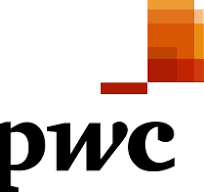

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


# 1. Import the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn = pd.read_csv('/content/drive/MyDrive/Dataset _ DA _ Oliver VU/02 Churn-Dataset - 01 Churn-Dataset.csv')

# 2. Data preparation & Cleaning

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn.drop_duplicates(inplace=True)

In [ ]:
churn.isna().sum()
churn.dropna(inplace=True)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
# Convert Total Charges to numerical type to visualize in box-plot
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn.dropna(inplace=True)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
churn['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
churn['Churn'] = churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Exploratory Data Analysis

In [ ]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785
std,0.368844,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


In [ ]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [ ]:
# List of categorical columns
categorical_cols = ['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines',
                    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                    'PaymentMethod','numAdminTickets', 'numTechTickets','Churn']

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(churn[col].value_counts())
    print("\n")

Frequency counts for SeniorCitizen:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


Frequency counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Frequency counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Frequency counts for OnlineBackup:
OnlineBackup
No             

# 4. Churn Analysis (Customer demographic analysis)

In [ ]:
overall_churn_rate = churn['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.58%


In [ ]:
churn['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


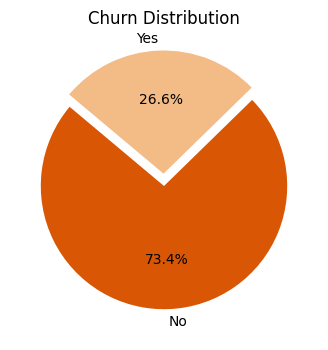

In [ ]:
# Get churn counts
churn_counts = churn['Churn'].value_counts()

# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#d85604','#f3bc87'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

<ipython-input-18-950485256769>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)


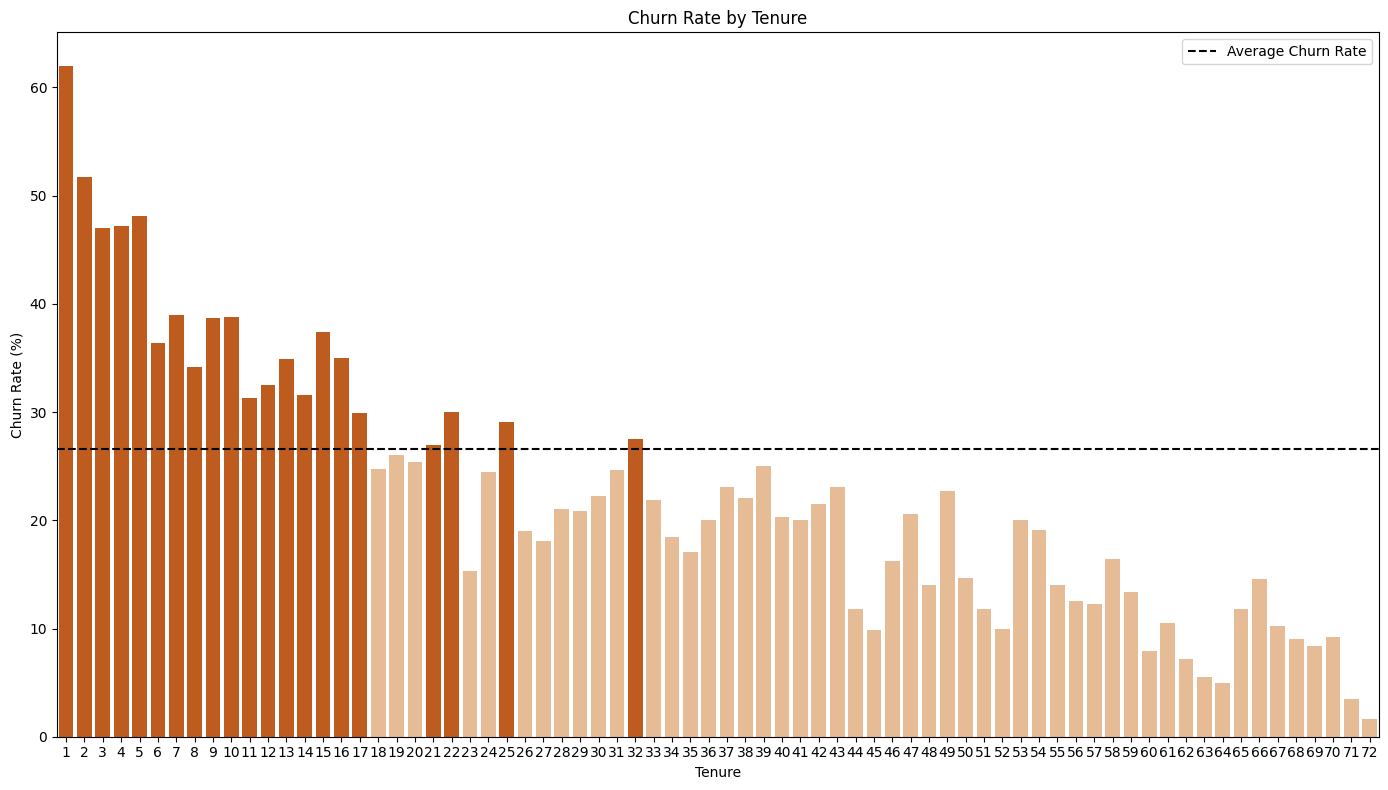

In [ ]:
#Calculate churn rate by tenure
tenure_churn = churn.groupby('tenure')['Churn'].agg(['mean', 'count'])
tenure_churn['churn_rate'] = tenure_churn['mean'] * 100

# Highlight categories that are above the average churn rate
highlight_tenure = tenure_churn[tenure_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(14, 8))
colors = ['#d85604' if tenure in highlight_tenure else '#f3bc87' for tenure in tenure_churn.index]
sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure')
plt.axhline(y=churn['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

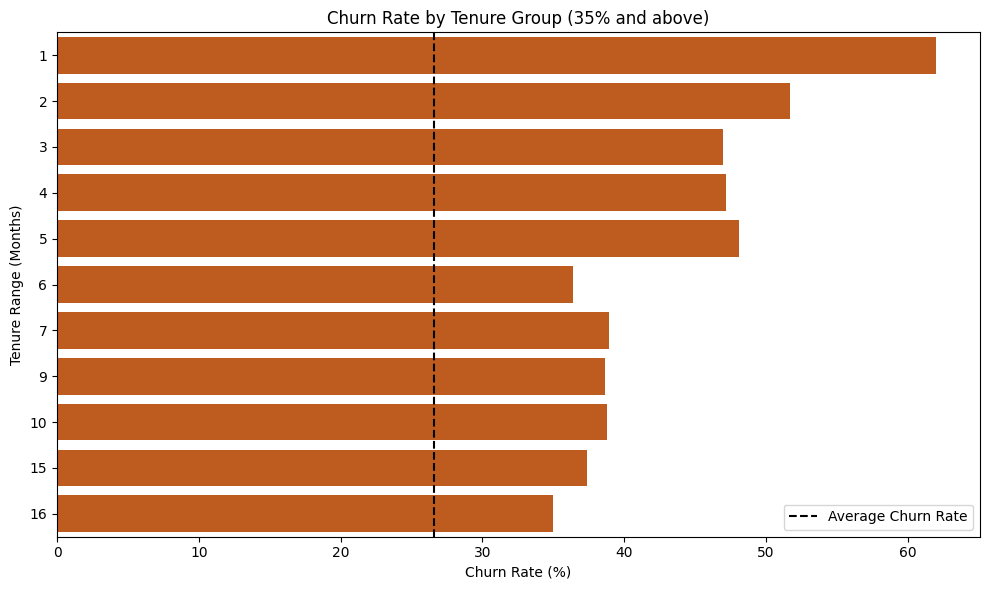

In [ ]:
# Filter tenure groups with churn rate >= 30%
high_churn_tenure = tenure_churn[tenure_churn['churn_rate'] >= 35]

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(y=high_churn_tenure.index, x='churn_rate', data=high_churn_tenure, orient='h', color = '#d85604')

plt.title('Churn Rate by Tenure Group (35% and above)')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Tenure Range (Months)')
plt.axvline(x=churn['Churn'].mean() * 100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-20-6a27c39b9cc5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_churn = churn.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
<ipython-input-20-6a27c39b9cc5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)


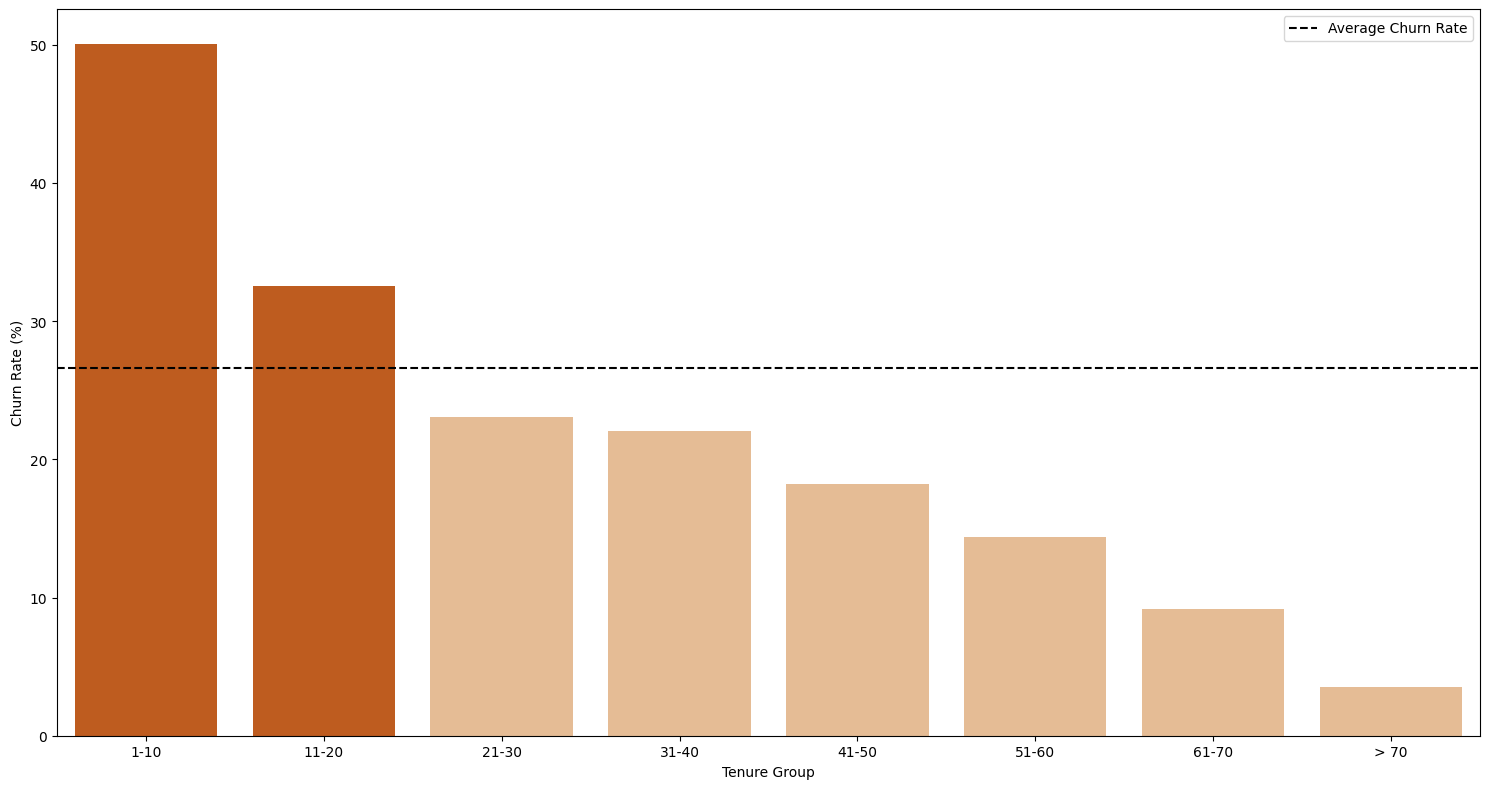

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 70']
churn['tenure_group'] = pd.cut(churn['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate by tenure group
tenure_group_churn = churn.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
tenure_group_churn['churn_rate'] = tenure_group_churn['mean'] * 100
tenure_group_churn = tenure_group_churn.sort_values(by='churn_rate', ascending=False)

# Highlight categories that are above the average churn rate
highlight_tenure_groups = tenure_group_churn[tenure_group_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(15, 8))
colors = ['#d85604' if group in highlight_tenure_groups else '#f3bc87' for group in tenure_group_churn.index]
sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.axhline(y=overall_churn_rate, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-21-87c6772762c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=column, data=churn, palette=['#d85604','#f3bc87'])
<ipython-input-21-87c6772762c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=column, data=churn, palette=['#d85604','#f3bc87'])
<ipython-input-21-87c6772762c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=column, data=churn, palette=['#d85604','#f3bc87'])


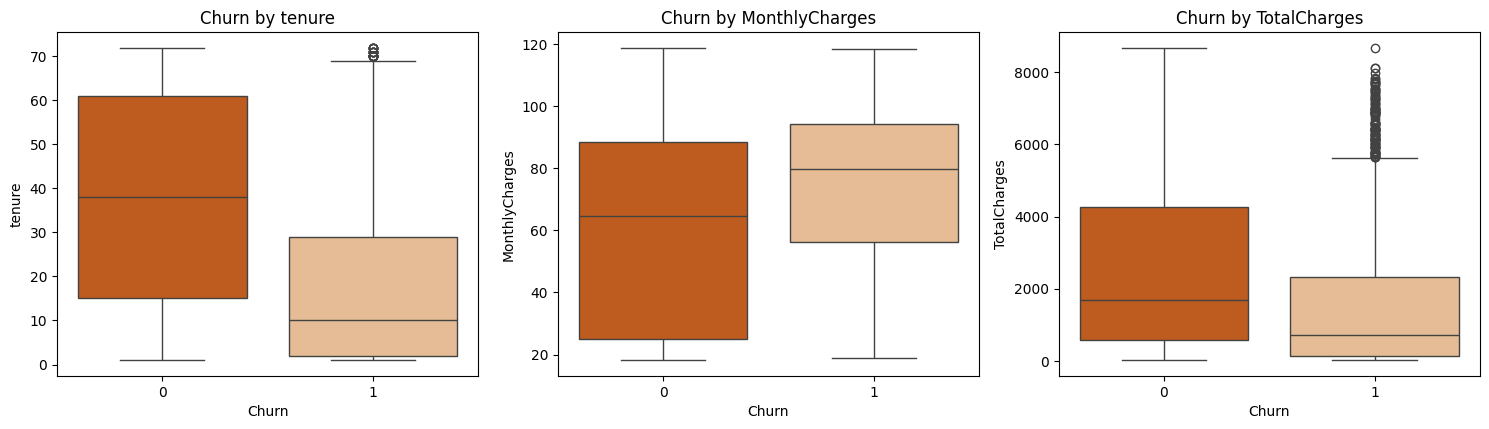

In [ ]:
features = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize=(15, 12))

for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=column, data=churn, palette=['#d85604','#f3bc87'])
    plt.title(f'Churn by {column}')
plt.tight_layout()

plt.show()

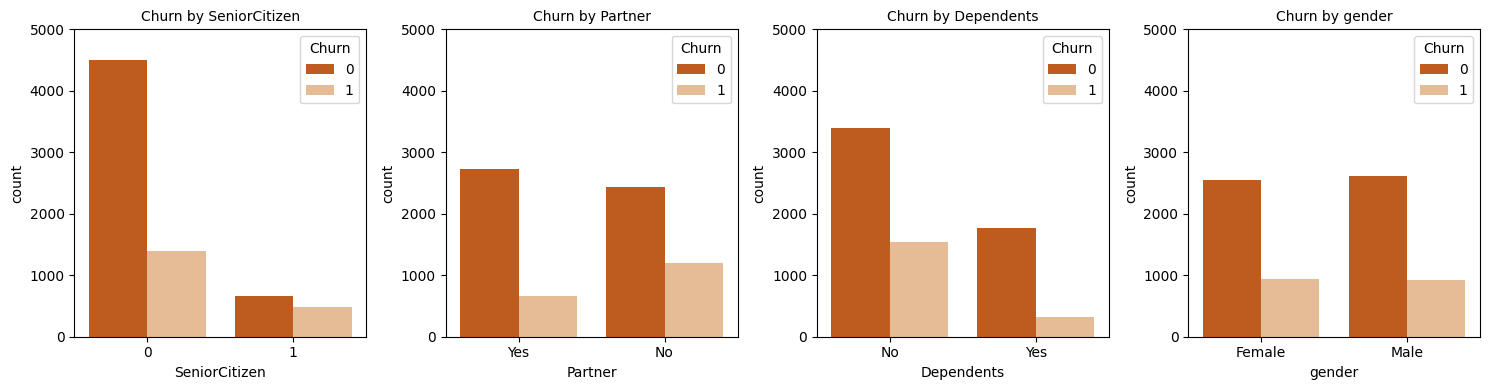

In [ ]:
# DEMOGRAPHICS

ymax = 5000

plt.figure(figsize=(15, 4))

cat_cols = ['SeniorCitizen','Partner', 'Dependents','gender']

for i, col in enumerate(cat_cols):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=col, hue='Churn', data=churn, palette = ['#d85604','#f3bc87'])
    plt.title(f'Churn by {col}',fontsize=10)
    plt.ylim(0, ymax)
    plt.tight_layout()
plt.show()

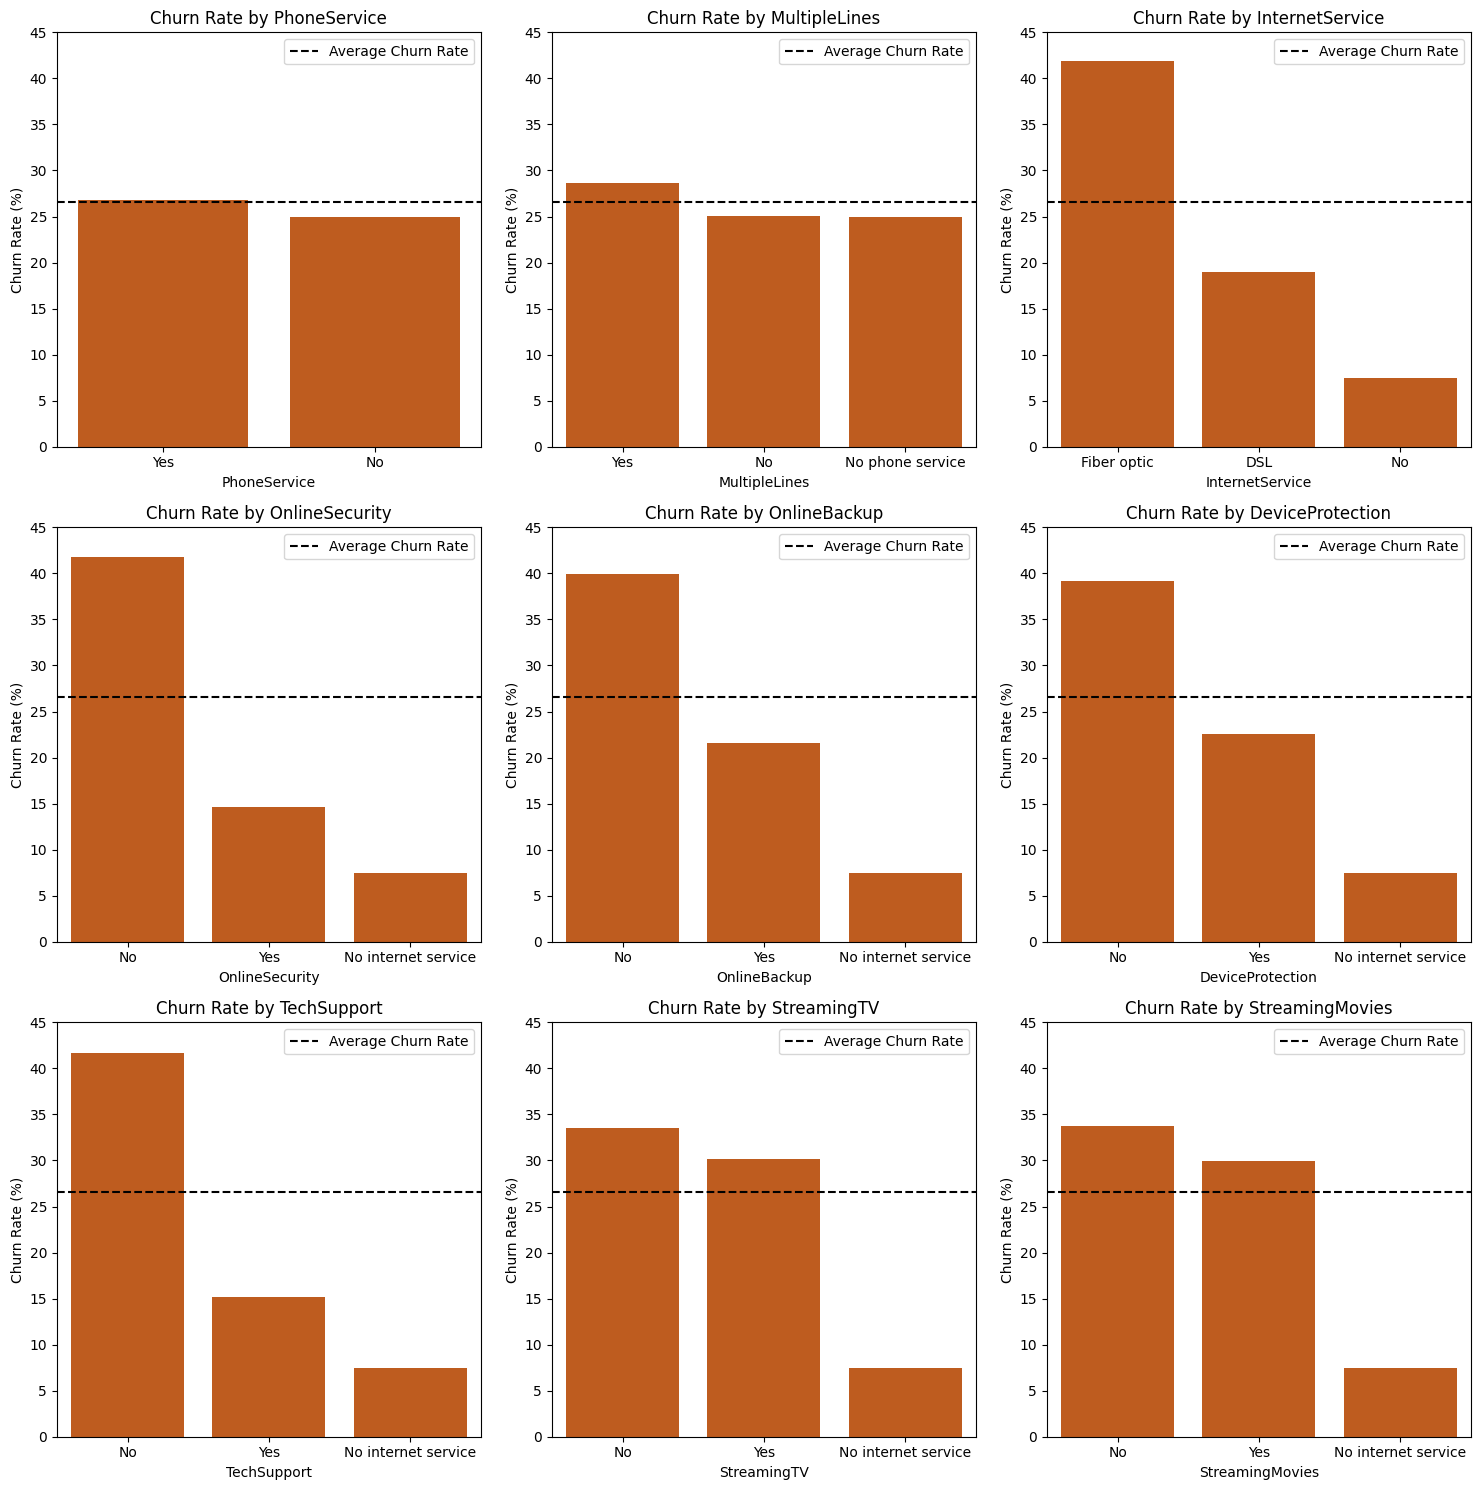

In [ ]:
# SERVICES SUBSCRIBED

service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate overall churn rate in percentage
overall_churn_rate = churn['Churn'].map({'Yes': 1, 'No': 0}).mean() * 100

# Set Y-axis limit
ymax = 45

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i + 1)
    service_churn = churn.groupby(col)['Churn'].agg(['mean', 'count'])
    service_churn['churn_rate'] = service_churn['mean'] * 100
    service_churn = service_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, color = '#d85604')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=churn['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
    plt.ylim(0, ymax)  # Set fixed y-axis range
    plt.legend()

plt.tight_layout()
plt.show()


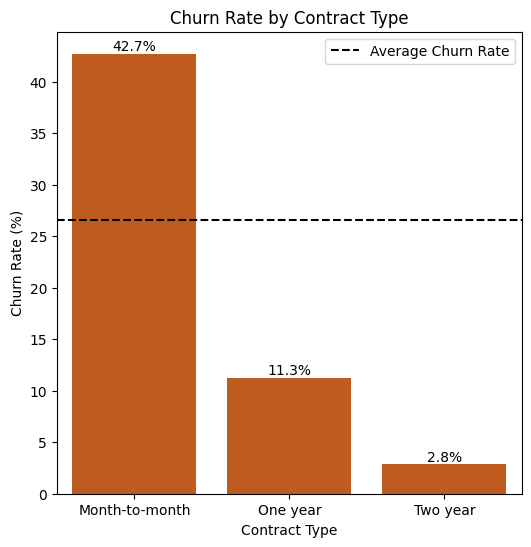

In [ ]:
#CONTRACT

# Calculate churn rate by contract type
contract_churn = churn.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn['churn_rate'] = contract_churn['mean'] * 100

# Create the bar plot
plt.figure(figsize=(6, 6))
bars = sns.barplot(x=contract_churn.index, y='churn_rate', data=contract_churn, color='#d85604')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')

# Add overall churn rate line
plt.axhline(y=churn['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')

# Add value labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.legend()
plt.show()


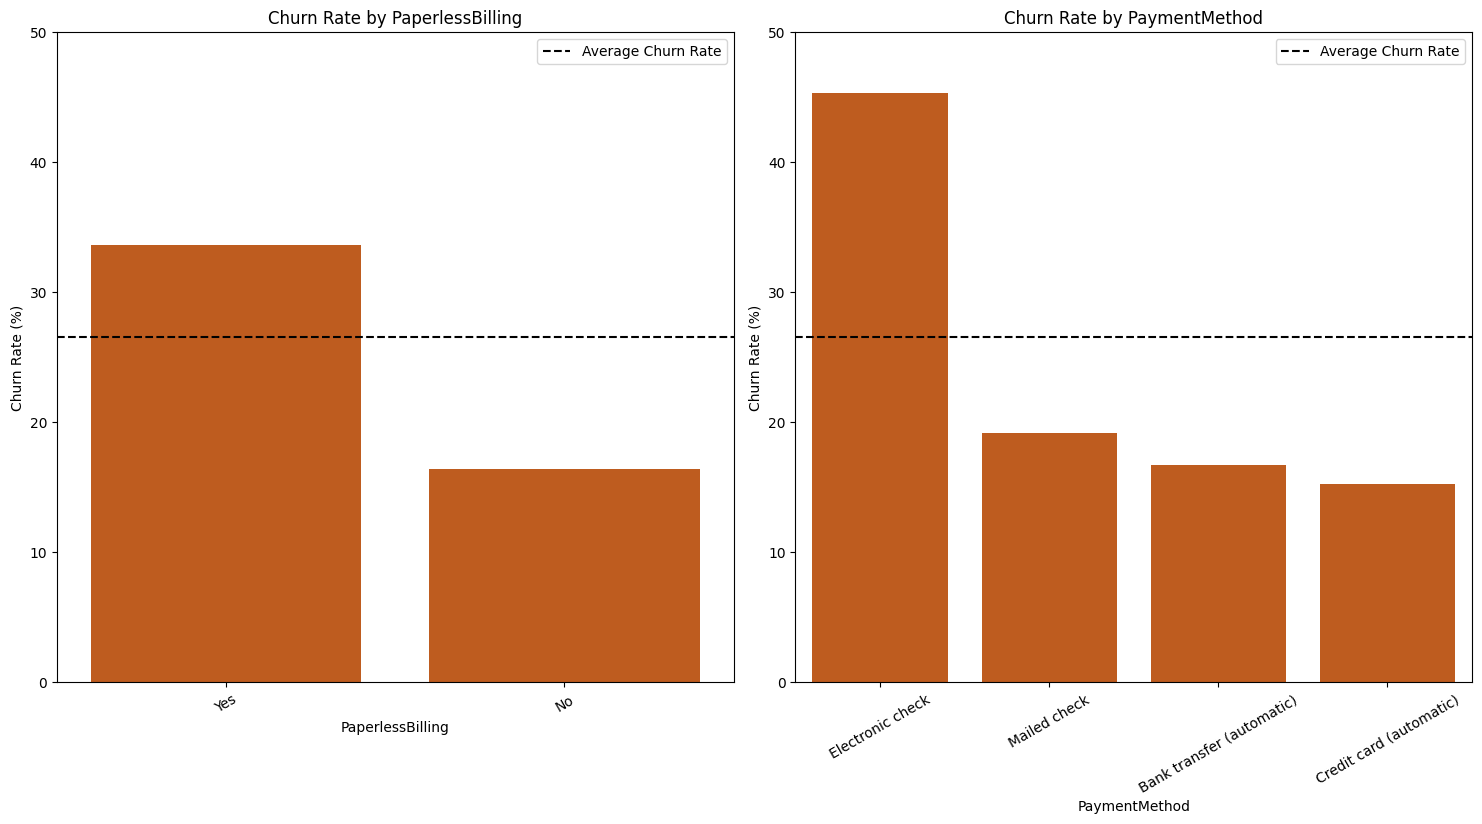

In [ ]:
# BILLINGS

billings = ['PaperlessBilling', 'PaymentMethod']

# Set Y-axis limit
ymax = 50

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(billings):
    plt.subplot(2, 2, i + 1)
    billing_churn = churn.groupby(col)['Churn'].agg(['mean', 'count'])
    billing_churn['churn_rate'] = billing_churn['mean'] * 100
    billing_churn = billing_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=billing_churn.index, y='churn_rate', data=billing_churn, color = '#d85604')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=churn['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
    plt.ylim(0, ymax)  # Set fixed y-axis range
    plt.xticks(rotation=30)
    plt.legend()

plt.tight_layout()
plt.show()


# 5. Feature Engineering

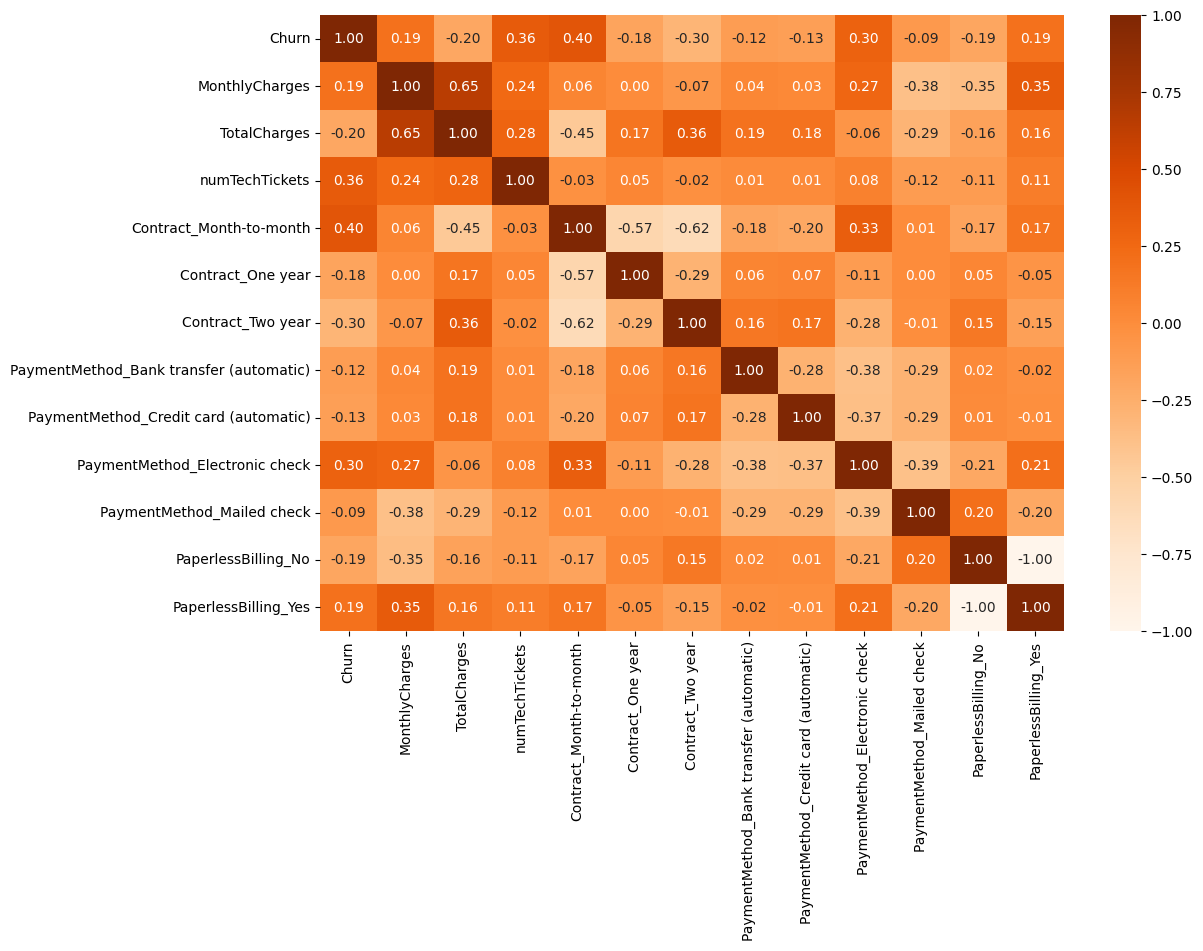

In [ ]:
correlation_cols = ['Churn', 'MonthlyCharges', 'TotalCharges', 'Contract',
                    'PaymentMethod', 'PaperlessBilling', 'numTechTickets']

# Convert categorical columns to numerical
data_encoded = pd.get_dummies(churn[correlation_cols])

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
oranges = sns.color_palette("Oranges", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f')

plt.show()

In [ ]:
# Encode categorical
churn['gender'] = churn['gender'].map({'Female': 1, 'Male': 0})
churn['Partner'] = churn['Partner'].map({'Yes': 1, 'No': 0})
churn['Dependents'] = churn['Dependents'].map({'Yes': 1, 'No': 0})
churn['PhoneService'] = churn['PhoneService'].map({'Yes': 1, 'No': 0})
churn['PaperlessBilling'] = churn['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [ ]:
churn['StreamingMovies'] = churn['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
churn['StreamingTV'] = churn['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
churn['MultipleLines'] = churn['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
churn['OnlineSecurity'] = churn['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
churn['OnlineBackup'] = churn['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
churn['DeviceProtection'] = churn['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
churn['TechSupport'] = churn['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1-10
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,0,0,31-40
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,0,0,1,1-10
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,0,41-50
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,0,0,1,1-10


In [ ]:
# One-hot encode the 'Contract' column
contract_dummies = pd.get_dummies(churn['Contract'], prefix='Contract')

# Concatenate the dummy variables with the original dataframe
churn = pd.concat([churn, contract_dummies], axis=1)

# Drop the original 'Contract' column
churn.drop('Contract', axis=1, inplace=True)

# Display the first few rows to verify the changes
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,Electronic check,29.85,29.85,0,0,0,1-10,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,Mailed check,56.95,1889.50,0,0,0,31-40,False,True,False
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,Mailed check,53.85,108.15,0,0,1,1-10,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,3,0,41-50,False,True,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,Electronic check,70.70,151.65,0,0,1,1-10,True,False,False


In [ ]:
# One-hot encode the 'PaymentMethod' column
payment_dummies = pd.get_dummies(churn['PaymentMethod'], prefix='PaymentMethod')

# One-hot encode the 'InternetService' column
internet_dummies = pd.get_dummies(churn['InternetService'], prefix='InternetService')

# Concatenate the dummy variables with the original dataframe
churn = pd.concat([churn, payment_dummies, internet_dummies], axis=1)

# Drop the original 'PaymentMethod' and 'InternetService' columns
churn.drop(['PaymentMethod', 'InternetService'], axis=1, inplace=True)

# Display the first few rows to verify the changes
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
churn[numerical_cols] = scaler.fit_transform(churn[numerical_cols])

print(churn[numerical_cols].describe())

             tenure  MonthlyCharges  TotalCharges
count  7.032000e+03    7.032000e+03  7.032000e+03
mean  -1.126643e-16    6.062651e-17 -1.119064e-16
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.280248e+00   -1.547283e+00 -9.990692e-01
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01
50%   -1.394171e-01    1.845440e-01 -3.908151e-01
75%    9.199259e-01    8.331482e-01  6.668271e-01
max    1.612573e+00    1.793381e+00  2.824261e+00


In [ ]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'numAdminTickets', 'numTechTickets', 'Churn', 'tenure_group',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

# 6. Modelling


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   object  
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   float64 
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   OnlineSecurity                           7032 non-null   int64   
 9   OnlineBackup                             7032 non-null   int64   
 10  DeviceProtection                         

In [ ]:
churn.drop(columns = ['customerID', 'tenure_group'], inplace=True)

# LOGISTIC REGRESSION MODEL

Confusion Matrix:
[[1408  141]
 [ 183  378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.67      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.79      0.80      2110
weighted avg       0.84      0.85      0.84      2110



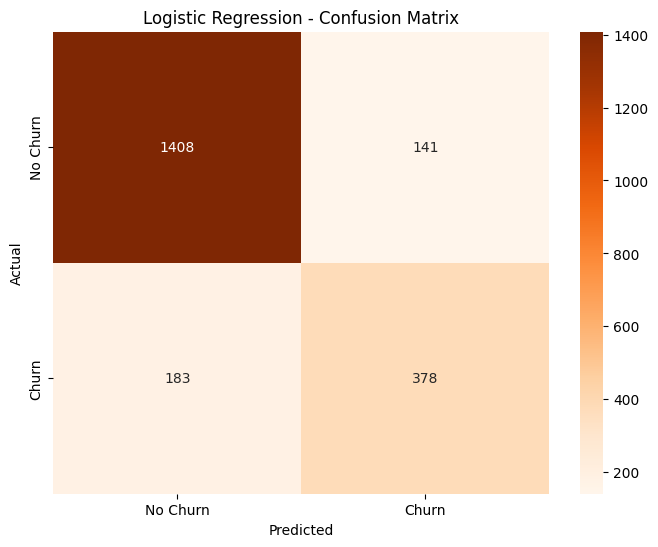

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# Define features and target variable
X = churn.drop(columns=['Churn'])
y = churn['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# DECISION TREE

Decision Tree - Confusion Matrix:
[[1338  211]
 [ 201  360]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1549
           1       0.63      0.64      0.64       561

    accuracy                           0.80      2110
   macro avg       0.75      0.75      0.75      2110
weighted avg       0.81      0.80      0.81      2110



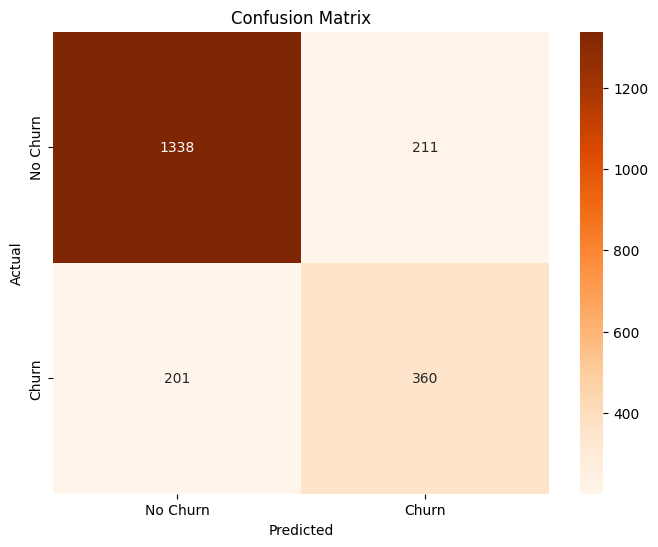

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Compute the confusion matrix for Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# XGBoost


XGBoost - Confusion Matrix:
[[1389  160]
 [ 181  380]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1549
           1       0.70      0.68      0.69       561

    accuracy                           0.84      2110
   macro avg       0.79      0.79      0.79      2110
weighted avg       0.84      0.84      0.84      2110



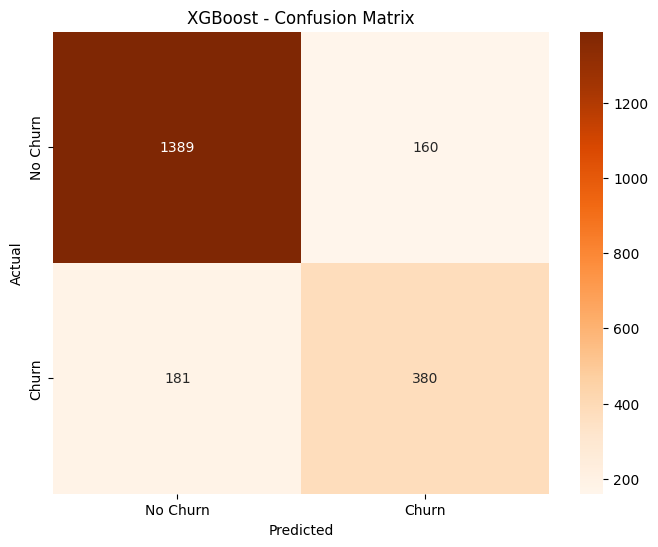

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Compute the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()


# 7. Model Evaluation

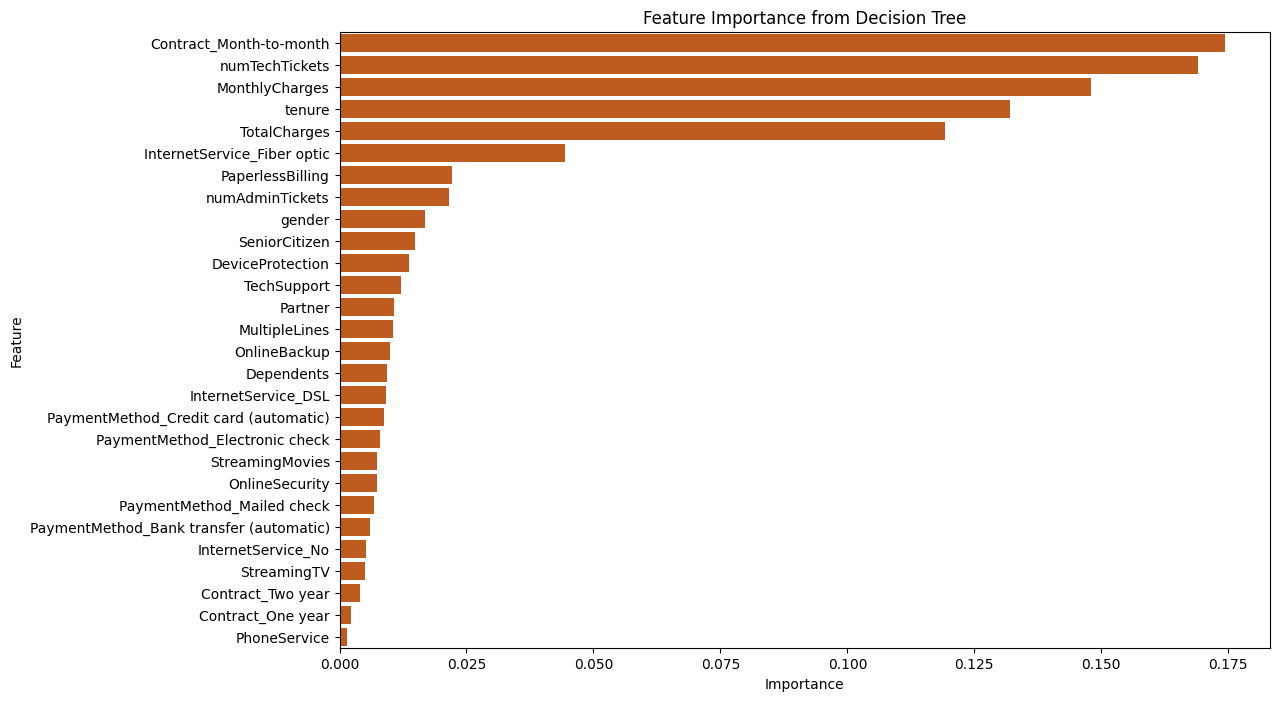

In [ ]:
# Get the feature importance from the Decision Tree model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, color = '#d85604')
plt.title('Feature Importance from Decision Tree')
plt.show()

# 8. Insights and Recommendations
1. Customer Retention Tactics Based on Churn Risk Profile
*   Incentives for Loyal Customers at Risk of Churn
    *   Offer targeted discounts to long-tenure customers flagged by the model as churn risks to acknowledge their loyalty and reduce attrition.
*   Engagement via Bundled Perks
    *   Offer packages like TechSupport + Streaming Add-ons to increase service value and stickiness.
2. Financial Flexibility for High-Value At-Risk Customers
*   Split Payment Plans
    *   Allow higher-billing customers to pay in smaller installments to reduce financial pressure.
*   Encourage Stable Payment Methods
    *   Promote use of auto-payment via credit cards or bank transfers to avoid missed payments causing involuntary churn.
3. Service-Related Churn Intervention
*  Root Cause Identification
   *   Analyze churn model features (e.g., frequent tech issues, slow speeds) to identify service-related churn drivers.
*  Proactive Technical Support
   *   Repeated Ticket Flagging: Identify customers with frequent complaints.
   *   Network Analytics Alerts: Use alerts to resolve issues before the customer contacts support.
   *   Support Prioritization: Move these customers up in the response queue.
   *   Preventative Maintenance: Schedule proactive audits, especially for fiber-optic users or high-value customers.
4. Personalized Retention Campaigns
*   Churn-Prone Segments
    *   Targeted Campaigns: Use email/SMS to send
        *   Tailored upgrade options
        *   Personalized retention offers (e.g., discounts, loyalty points)
        *   Surveys to understand "what would make you stay?"
*   Continuous Engagement
    *   Check-ins with:
        *   Month-to-month contract holders
        *   Downgraders or recent complainants
5. Churn Model Feedback Loop & Monitoring
*   Monthly Review of Model Outcomes
    *   Who accepted offers and stayed
    *   Who churned despite offers
*   Refinement via Feedback
    *   Feed these results back to retrain the model
    *   Improve precision (targeting accuracy) and recall (coverage of at-risk customers)
6. Predict Churn Risk for New Customers
*   Use the model during customer onboarding to:
    *   Flag high-risk customers early
    *   Offer onboarding assistance, better support, or perks to reduce early churn